# Preprocessing  & Scikit Learn - Part 1 

## Import python modules

In [2]:
# import scikit learn
import sklearn

from sklearn import datasets
# --------------------------------------
from sklearn import preprocessing
# --------------------------------------
from sklearn.model_selection import train_test_split
# --------------------------------------
from sklearn.preprocessing import LabelEncoder
# --------------------------------------
from sklearn.decomposition import PCA
# --------------------------------------
from sklearn.metrics import accuracy_score, confusion_matrix
# --------------------------------------
import warnings

import numpy as np
import pandas as pd
# --------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
# --------------------------------------
# show several outputs in one cell. 
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
# --------------------------------------
warnings.simplefilter("ignore")
%matplotlib inline
# --------------------------------------

## The bicycle rental dataset

Dataset description:
* **outstanding_branch** - outstanding branch name, with highest number of rentals  
* **popular_color** - the most popular  color of rented bicycle for the day
* **month_number** - number of month (between 1 to 12)
* **day_of_week** - days of week ('Sun', 'Mon', ...)
* **working_day** - is this a working day or not
* **temperature** - normalized temperature
* **humidity** - normalized humidity
* **wind_speed** - normalized wind speed
* **number_registered** - number of registered bicycles
* **count_rentals** - number of rented bicycles 

## Loading dataset

### Read the dataset from csv
Let's read the dataset and display some information

In [2]:
df = pd.read_csv('./data/bicycle_rental.csv', header=0, sep=',') 
df.head(3)

,outstanding_branch,popular_color,month_number,day_of_week,working_day,temperature,humidity,wind_speed,number_registered,count_rentals
0,Holon,gray,1,Sat,NO,0.344167,0.805833,0.160446,654,985
1,Beer Sheva,gray,1,Sun,NO,0.363478,0.696087,0.248539,670,801
2,Holon,blue,1,Mon,YES,0.196364,0.437273,0.248309,1229,1349


### Split to X and y

Assume that the **'popular_color' column** functions as the target value.<br/>
Is it a classification problem or a regression problem?<br/>

We need to split the data to feature vectors and a target value:

In [3]:
target_column = 'popular_color'
y = df[target_column]
X = df.drop([target_column],axis=1)
X.head(3)
y.head(3)

,outstanding_branch,month_number,day_of_week,working_day,temperature,humidity,wind_speed,number_registered,count_rentals
0,Holon,1,Sat,NO,0.344167,0.805833,0.160446,654,985
1,Beer Sheva,1,Sun,NO,0.363478,0.696087,0.248539,670,801
2,Holon,1,Mon,YES,0.196364,0.437273,0.248309,1229,1349


0    gray
1    gray
2    blue
Name: popular_color, dtype: object

### Some Data Cleansing 
#### Remove rows or columns

We might want to use _boolean indexing_, and remove the data passing the condition.<br/>
In this case we want to find all the non-working days and filter them<br/>

Note that non working days includes rows which the value of "working_day" is 'NO'

In [4]:
non_work_days=X[(X["working_day"]=='NO')]
'rows passing condition:'
non_work_days.head()

'rows passing condition:'

,outstanding_branch,month_number,day_of_week,working_day,temperature,humidity,wind_speed,number_registered,count_rentals
0,Holon,1,Sat,NO,0.344167,0.805833,0.160446,654,985
1,Beer Sheva,1,Sun,NO,0.363478,0.696087,0.248539,670,801
7,Tel Aviv,1,Sat,NO,0.165000,0.535833,0.266804,891,959
8,Haifa,1,Sun,NO,0.138333,0.434167,0.361950,768,822
14,Haifa,1,Sat,NO,0.233333,0.498750,0.157963,1026,1248


**The `drop` method** removes rows or columns (by default it removes rows).<br/>

For more information goto the [pandas dataframe drop documentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop.html)

In [5]:
X_work_days=X.drop(non_work_days.index)
y_work_days=y.drop(non_work_days.index)
'original #rows  : %d' %X.shape[0]
'after-drop #rows: %d' %X_work_days.shape[0]

'original #rows  : 731'

'after-drop #rows: 500'

Lets check how many values do the 'string' columns contain.<br/>

First We find the string columns.
Here we'll use the select_dtypes method (check the [select_dtypes documentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.select_dtypes.html)):


In [6]:
X_work_days_obj_clmns = X_work_days.select_dtypes(include='object')
X_work_days_obj_clmns.head()

,outstanding_branch,day_of_week,working_day
2,Holon,Mon,YES
3,Beer Sheva,Tue,YES
4,Holon,Wed,YES
5,Beer Sheva,Thu,YES
6,Holon,Fri,YES


Lets validate the number of values after filtering and display the values of the 'working_day' column.
(check documentation for: [nunique](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.nunique.html) and [unique](https://pandas.pydata.org/docs/reference/api/pandas.Series.unique.html))

In [7]:
X_work_days_obj_clmns.nunique()
X_work_days_obj_clmns['working_day'].unique()

outstanding_branch    4
day_of_week           5
working_day           1
dtype: int64

array(['YES'], dtype=object)

So the values (of non-working days) were removed successfully.

It seems that the 'working_day' column doesn't provide (it contains only one value, let's remove it).<br/>
Note that setting the `axis` parameter to 1 (`axis=1`), will indicate that we are dropping columns

In [8]:
'original #columns  : %d' %X.shape[1]
X_work_days=X_work_days.drop('working_day',axis=1)
'after-drop #columns: %d' %X_work_days.shape[1]
X_work_days.head(3)
y_work_days.head(3)

'original #columns  : 9'

'after-drop #columns: 8'

,outstanding_branch,month_number,day_of_week,temperature,humidity,wind_speed,number_registered,count_rentals
2,Holon,1,Mon,0.196364,0.437273,0.248309,1229,1349
3,Beer Sheva,1,Tue,0.200000,0.590435,0.160296,1454,1562
4,Holon,1,Wed,0.226957,0.436957,0.186900,1518,1600


2    blue
3    blue
4     red
Name: popular_color, dtype: object

### Split to train and test

Assume the dataset is for a learning problem and it is not splitted to train and test.<br/>
We need to split the data to train and test and we could use the `sklearn.model_selection` module called `train_test_split` (for more information read the 
[train_test_split documentation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html))<br/>
In order to set a reproducible result, we set a predifined random state (the `random_state` parameter).

The following is an example of the usage:

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X_work_days, y_work_days, test_size=0.15, random_state=42, shuffle=True)
X_train.head(3)
y_train.head(3)

,outstanding_branch,month_number,day_of_week,temperature,humidity,wind_speed,number_registered,count_rentals
445,Tel Aviv,3,Wed,0.531667,0.821250,0.089558,5108,6230
394,Beer Sheva,1,Mon,0.269167,0.400833,0.215792,3498,3624
101,Tel Aviv,4,Tue,0.502500,0.739167,0.274879,1777,2034


445     red
394     red
101    blue
Name: popular_color, dtype: object

## Some Feature Engineering:

### Transform string values to numeric  - case 1
Case 1 - values have an intuitive value 

Let's go back to the original dataset and display the values of our two 'string' features: 
* 'day_of_week'
* 'outstanding_branch'

In [10]:
# assume we are loading the train set:
trainset = pd.read_csv('./data/bicycle_rental.csv', header=0, sep=',') 

trainset['day_of_week'].unique()
trainset['outstanding_branch'].unique()

array(['Sat', 'Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri'], dtype=object)

array(['Holon', 'Beer Sheva', 'Tel Aviv', 'Haifa'], dtype=object)

In [11]:
trainset.head()

,outstanding_branch,popular_color,month_number,day_of_week,working_day,temperature,humidity,wind_speed,number_registered,count_rentals
0,Holon,gray,1,Sat,NO,0.344167,0.805833,0.160446,654,985
1,Beer Sheva,gray,1,Sun,NO,0.363478,0.696087,0.248539,670,801
2,Holon,blue,1,Mon,YES,0.196364,0.437273,0.248309,1229,1349
3,Beer Sheva,blue,1,Tue,YES,0.200000,0.590435,0.160296,1454,1562
4,Holon,red,1,Wed,YES,0.226957,0.436957,0.186900,1518,1600


The **'day_of_week' column** could be transfered to an <u>ordinal order</u> which make sense.<br/>
The **'outstanding_branch' column** doesn't have such an order.<br/>

We could transfer 'day_of_week' values to there ordinal order in the week.<br/>
(For more information visit the [pandas dataframe replace documentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.replace.html))<br/>

**'is_work_day'** - We will use the Israeli week order as a new feature and remove the original one:

In [12]:
trainset['il_day_indx'] = trainset['day_of_week'].replace({'Sun':1, 'Mon':2, 'Tue':3, 'Wed':4, 'Thu':5, 'Fri':6, 'Sat':7})
# remove the original columns day_of_week':
trainset = trainset.drop(['day_of_week'],axis=1)
trainset.head()

,outstanding_branch,popular_color,month_number,working_day,temperature,humidity,wind_speed,number_registered,count_rentals,il_day_indx
0,Holon,gray,1,NO,0.344167,0.805833,0.160446,654,985,7
1,Beer Sheva,gray,1,NO,0.363478,0.696087,0.248539,670,801,1
2,Holon,blue,1,YES,0.196364,0.437273,0.248309,1229,1349,2
3,Beer Sheva,blue,1,YES,0.200000,0.590435,0.160296,1454,1562,3
4,Holon,red,1,YES,0.226957,0.436957,0.186900,1518,1600,4


Great, but what about 'outstanding_branch'?<br/>
We will need to find another solution for 'outstanding_branch' ...

### Transform string values to numeric  - case 2
Case 2 - values don't have an intuitive value 

Let's check the frequency of the **'outstanding_branch' column** using the pandas series `value_counts` function.<br/>
(For more information check the [pandas series value_counts documentation](https://pandas.pydata.org/docs/reference/api/pandas.Series.value_counts.html))

We call this a **histogram**: 

In [13]:
trainset['outstanding_branch'].value_counts()

Beer Sheva    195
Tel Aviv      185
Haifa         184
Holon         167
Name: outstanding_branch, dtype: int64

There are several ways to visualize histograms.<br/>
For instance, we could also visualize this using a `matplotlib` `bar` method, a series `hist` method from or an `sns` `countof` method  

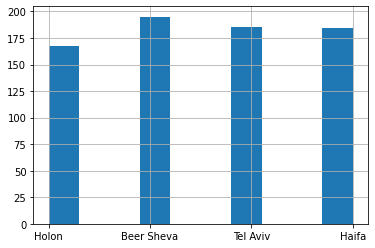

In [14]:
trainset['outstanding_branch'].hist()

In case we don't have an order in a categorical (string here) value, we could check for existence of the value.<br/>
The **pandas `get_dummies` method** does just that, by transferring each possible string value to a binary feature.<br/>
(For more information check the [pandas get_dummies documentation](https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html))

Let's apply this for the 'outstanding_branch' column:

In [15]:
outstanding_branchs = pd.get_dummies(trainset['outstanding_branch'],prefix='branch_',drop_first=False)
df_binary = pd.concat([trainset,outstanding_branchs],axis=1).drop('outstanding_branch',axis=1)
df_binary.head()

,popular_color,month_number,working_day,temperature,humidity,wind_speed,number_registered,count_rentals,il_day_indx,branch__Beer Sheva,branch__Haifa,branch__Holon,branch__Tel Aviv
0,gray,1,NO,0.344167,0.805833,0.160446,654,985,7,0,0,1,0
1,gray,1,NO,0.363478,0.696087,0.248539,670,801,1,1,0,0,0
2,blue,1,YES,0.196364,0.437273,0.248309,1229,1349,2,0,0,1,0
3,blue,1,YES,0.200000,0.590435,0.160296,1454,1562,3,1,0,0,0
4,red,1,YES,0.226957,0.436957,0.186900,1518,1600,4,0,0,1,0


### Transfer continues numeric values to discrete

We have a couple of options to turn continues values to discrete ones.<br/>
Actually the feature values don't have to be continues.<br/>

We might want to divide int values to groups.<br/>
The **pandas `qcut` method**, does this by dividing the values into quantiles (For more information check the [pandas qcut documentation](https://pandas.pydata.org/docs/reference/api/pandas.qcut.html)).

Let's do this for the 'count_rentals' feature (number of rented bicycles).

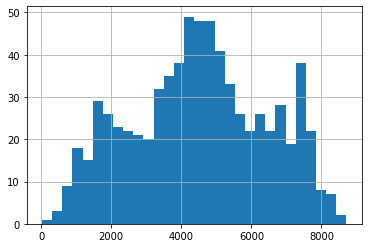

In [16]:
df_binary['count_rentals'].hist(bins=30)

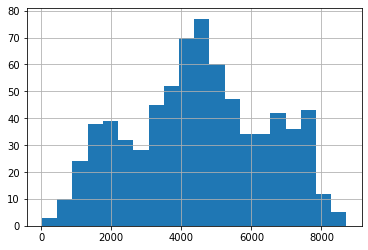

In [17]:
df_binary['count_rentals'].hist(bins=20)

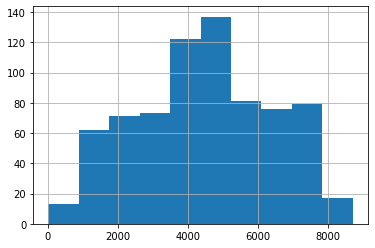

In [18]:
df_binary['count_rentals'].hist(bins=10)

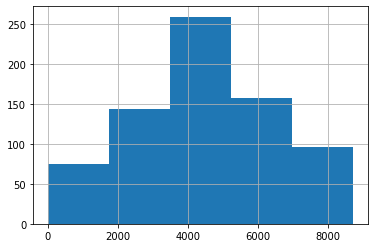

In [19]:
df_binary['count_rentals'].hist(bins=5)

In [20]:
cnt_descrete=pd.qcut(df_binary['count_rentals'], q=4,labels=[0,1,2,3])
cnt_descrete.name='cnt_descrete'
df_descrete = pd.concat([df_binary,cnt_descrete],axis=1).drop('count_rentals',axis=1)
df_descrete.head()

,popular_color,month_number,working_day,temperature,humidity,wind_speed,number_registered,il_day_indx,branch__Beer Sheva,branch__Haifa,branch__Holon,branch__Tel Aviv,cnt_descrete
0,gray,1,NO,0.344167,0.805833,0.160446,654,7,0,0,1,0,0
1,gray,1,NO,0.363478,0.696087,0.248539,670,1,1,0,0,0,0
2,blue,1,YES,0.196364,0.437273,0.248309,1229,2,0,0,1,0,0
3,blue,1,YES,0.200000,0.590435,0.160296,1454,3,1,0,0,0,0
4,red,1,YES,0.226957,0.436957,0.186900,1518,4,0,0,1,0,0


### Exercise 1 - Feature Engineering

In this exercise start with the original dataframe df.<br/>
1. Create a new feature (column) called 'is_work_time', which could contain 2 values:
  * 0 (for non-working time)
  * 1: for working time 
  * We consider Non working time, as one of the following (or more):  
    * a value of 'NO' for the 'working_day' column
    * Month number 7 or 8 (Summer month - July or August) for the 'month_number' column 
  * After creating this new column, remove the 'working_day' and the 'month_number' columns.
2. Create a 'work_day_order' column, containing the work day order as following:
  * 1 - beginning of week, including 'Sun' and 'Mon'
  * 2 - middle of the week, including 'Tue', 'Wed', 'Thu'
  * 3 - End of week, including 'Fri' and 'Sat'
  * Remove the original 'day_of_week' column.
3. Discretize 'popular_color' on existence bases of the colors (exists = 1, doesn't exist = 0).
   * Use 'is_color' as a prefix
4. Discretize 'wind_speed' into 5 parts, using the pandas qcut command 
   * The new column should be called 'wind_discrete'
   * remove the 'wind_speed' column

In [ ]:
# assume we are loading the train set:
trainset = pd.read_csv('./data/bicycle_rental.csv', header=0, sep=',') 
trainset.head(3)

In [ ]:
# Exercise 1 - part 1 your solution:


In [ ]:
# Exercise 1 - part 2 your solution:


In [ ]:
# Exercise 1 - part 3 your solution:


In [ ]:
# Exercise 1 - part 4 your solution:


## Feature Engineering - part 2

### Scaling with Scikit Learn

We perform standardization with the `sklearn.preprocessing` module's `StandardScaler` (For more information visit:  [StandardScaler documentation](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)).

The following cells demonstreate a usage example for `StandardScaler`, on our dataset.

Let's first reload the information and select some numeric columns: 

In [5]:
df = pd.read_csv('./data/bicycle_rental.csv') 
target_column = 'popular_color'
y = df[target_column]
X = df[['temperature', 'humidity', 'wind_speed']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42, shuffle=True)
X_train.head(3)

,temperature,humidity,wind_speed
220,0.775000,0.570417,0.151121
650,0.437500,0.539167,0.235092
275,0.384167,0.760833,0.083346


In [6]:
scaler = preprocessing.StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns, index=X_test.index)
X_train_scaled.head(3)

,temperature,humidity,wind_speed
220,1.533369,-0.422406,-0.508436
650,-0.337099,-0.643327,0.580513
275,-0.632677,0.923734,-1.387356


We could visualize the pdf (probability density function change) with `sns.kdeplot`:

Text(0.5, 1.0, 'Before Scaling')

Text(0.5, 0, 'features')

Text(0.5, 1.0, 'After Standard Scaler')

Text(0.5, 0, 'features')

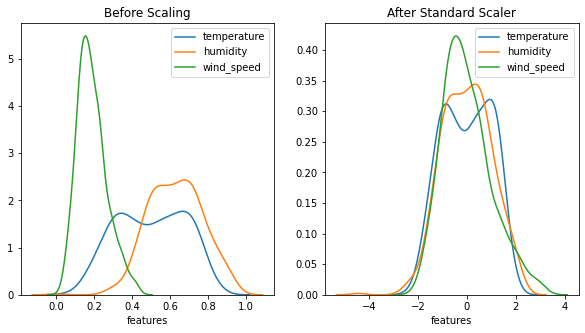

In [7]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 5))

ax1.set_title('Before Scaling')
ax1.set_xlabel('features')
sns.kdeplot(X_train.iloc[:,0], ax=ax1)
sns.kdeplot(X_train.iloc[:,1], ax=ax1)
sns.kdeplot(X_train.iloc[:,2], ax=ax1)

ax2.set_title('After Standard Scaler')
ax2.set_xlabel('features')
sns.kdeplot(X_train_scaled.iloc[:,0], ax=ax2)
sns.kdeplot(X_train_scaled.iloc[:,1], ax=ax2)
sns.kdeplot(X_train_scaled.iloc[:,2], ax=ax2)
plt.show()

For minmax normalization we could use the `sklearn.preprocessing` `MinMaxScaler` (For more information visit the [MinMaxScaler documentation](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html))

The following is a usage example for `MinMaxScaler`, on our dataset:

In [8]:
minmax_scaler = preprocessing.MinMaxScaler(feature_range=(-1, 1))
X_train_minmax = pd.DataFrame(minmax_scaler.fit_transform(X_train), columns=X_train.columns, index=X_train.index)
X_test_minmax = pd.DataFrame(minmax_scaler.transform(X_test), columns=X_test.columns, index=X_test.index)
X_train_minmax.head(3)

,temperature,humidity,wind_speed
220,0.784017,0.185282,-0.385791
650,-0.057066,0.120347,0.014861
275,-0.189977,0.580952,-0.709169


Text(0.5, 1.0, 'Before Scaling')

Text(0.5, 0, 'features')

Text(0.5, 1.0, 'After Min-Max[-1,1] Scaler')

Text(0.5, 0, 'features')

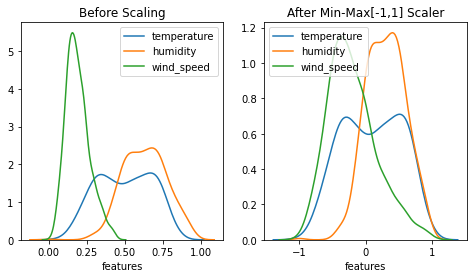

In [9]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(8, 4))

ax1.set_title('Before Scaling')
ax1.set_xlabel('features')
sns.kdeplot(X_train.iloc[:,0], ax=ax1)
sns.kdeplot(X_train.iloc[:,1], ax=ax1)
sns.kdeplot(X_train.iloc[:,2], ax=ax1)

ax2.set_title('After Min-Max[-1,1] Scaler')
ax2.set_xlabel('features')
sns.kdeplot(X_train_minmax.iloc[:,0], ax=ax2)
sns.kdeplot(X_train_minmax.iloc[:,1], ax=ax2)
sns.kdeplot(X_train_minmax.iloc[:,2], ax=ax2)
plt.show()

### Detect correlated features

The Pearson correlation coefficient is given as a build in 'corr' dataframe (for more information visit the [pandas dataframe corr documentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html)).<br/>

In [24]:
trainset = pd.read_csv('./data/bicycle_rental.csv') 
df_numeric = trainset.select_dtypes(include=np.number)
df_numeric.corr()

,month_number,temperature,humidity,wind_speed,number_registered,count_rentals
month_number,1.000000,0.220205,0.222204,-0.207502,0.293488,0.279977
temperature,0.220205,1.000000,0.126963,-0.157944,0.540012,0.627494
humidity,0.222204,0.126963,1.000000,-0.248489,-0.091089,-0.100659
wind_speed,-0.207502,-0.157944,-0.248489,1.000000,-0.217449,-0.234545
number_registered,0.293488,0.540012,-0.091089,-0.217449,1.000000,0.945517
count_rentals,0.279977,0.627494,-0.100659,-0.234545,0.945517,1.000000


We could also use a visualization, with **the `sns` `heatmap` function**:

<Figure size 360x360 with 0 Axes>

Text(0.5, 1.0, 'Pearson Correlation')

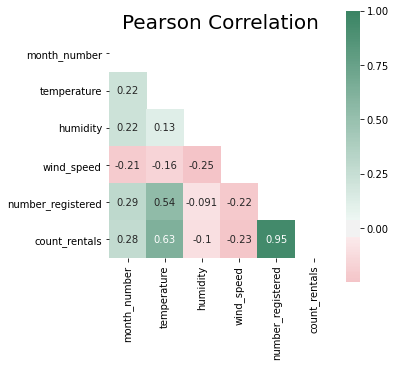

In [25]:
df_numeric = trainset._get_numeric_data()

mask = np.zeros_like(df_numeric.corr(),dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
cmap = sns.diverging_palette(10,150,as_cmap=True)

plt.figure(figsize=(5, 5))
sns.heatmap(df_numeric.corr(), cmap=cmap, annot=True, mask=mask, square=True, center=0)
plt.title('Pearson Correlation',size=20)
plt.show()

If we decide to remove features with **correlation > 0.8**, we need to **remove either 'number_registered' or 'count_rentals'**

### Dimensionality reduction

We could perform dimensionality reduction, instead or in addition to feature selection.<br/>

We will do this using the `sklearn.decomposition`'s `PCA` method (for more information visit the [sickit learn's PCA documentation](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html)).<br/>

We could decide about the number of principal components, using the `n_components` parameter:

In [26]:
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(df_numeric)

pca.explained_variance_
pca.explained_variance_ratio_

array([6026503.43445468,  160685.777545  ])

array([0.97402756, 0.02597068])

Setting the parameter of the number of components to be less than one, set's the minimum number of components for a >= information of the given value:

In [27]:
pca = PCA(0.9)
reduced_data = pd.DataFrame(pca.fit_transform(df_numeric),columns=['x1'],index=df_numeric.index)
reduced_data.shape[1]
reduced_data.head(3)
pca.explained_variance_
pca.explained_variance_ratio_
pca.components_

1

,x1
0,4623.184922
1,4757.211977
2,3980.347547


array([6026503.43445467])

array([0.97402756])

array([[-4.06410714e-04, -4.48271696e-05,  5.69757649e-06,
         7.28865727e-06, -6.22592181e-01, -7.82546362e-01]])

### Exercise 2 - Feature Engineering (part 2)

In this exercise, you will work on the iris dataset.
1. fit minmax scaler, between [0,1]  
  * fit and apply on train set
  * apply on test set
2. Detect correlated features on the scaled train set.
   * Display the correlation
   * assuming correlated values have a correlation of > 0.9, are there any correlations, neede to be filtered?
3. Perform dimensionality reduction, using PCA
   * Use components covering at least 0.9 of the information
   * how many components were used?

In [ ]:
# import the iris dataset
iris_dataset =datasets.load_iris()
X = pd.DataFrame(iris_dataset.data, columns=iris_dataset.feature_names)
y = pd.Series(iris_dataset.target)
y.name = 'target'
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)
X_train.head(3)
y_train.head(3)

In [ ]:
# Exercise 2, part 1, your solution:


In [ ]:
# Exercise 2, part 2, your solution:


In [ ]:
# Exercise 2, part 3, your solution:
